# CORD-19 Software Mentions - Access Study

## Relation between citation characteristics and accessibility for analysis (RQ2)

In order to understand research software projects better, e.g., to
determine the qualities and characteristics that make research software projects
successful under a given definition of success, or that help make them sustainable,
or that underlie their collapse, access to their source code repositories is needed.
We wanted to find out which characteristics of software citations enable this access,
and how they relate to adherence to the software citation principles.

Some observable qualities of software mentions and citations can be linked to
adherence to the software citation principles:
a citation to software follows the principle of *Importance*, 
not mentioning a software violates that principle; 
identifying authors in references follows the *Credit and attribution* principle; 
providing access to a persistently archived version of source code in citations or references follows the *Persistence* principle; 
providing access to the source code more generally follows the *Accessibility* principle,
which is the one that this question is most concerned with;
providing version information for software that was used follows the *Specificity* principle.

The results of this part of the study would provide evidence concerning the suitability
of the software citation principles for software accessibility.

## Methodology

The dataset of 80 software mentions was manually annotated by SD to
classify for adherence to the software citation principles, and the
possibility to directly or indirectly access the source code of the
mentioned software.
The table below presents the annotations for
mention features that were actually found in the dataset. The dataset
itself is available as *CSM\_sampled\_mention\_access.csv*.

  | Code |   Description |
  | :--- | :--- |
  | VER | Version information in reference
  | CVER | Version information near mention
  | CRE | Information in reference allowing for personal credit
  | REP | Link to community repository in reference
  | CACC | Link to source code near mention

> Table: Annotations for accessibility
  and adherence to the software citation principles, for which
  respective mention features could be found in our dataset.

In [51]:
# Import dependencies
import pandas as pd
import numpy as np

We read the access dataset as a pandas dataframe, and print it as a sanity check.

In [52]:
df = pd.read_csv(r'../data/access_study/CSM_sampled_mention_access.csv', encoding='unicode_escape', engine='python', index_col=False).fillna(0)
print(df)

    Unnamed: 0   ID       Title QACode Mention Type  \
0            0    1  Sequencher     SC          INS   
1            1    1  Sequencher     SC          NAM   
2            2    1  Sequencher     SC          NAM   
3            3    1  Sequencher     SC          PRO   
4            4    1  Sequencher     SC          INS   
..         ...  ...         ...    ...          ...   
75          75   91         SYN     ST          PUB   
76          76   94    Adequest     SC          INS   
77          77   96   NRSur PHM     SC          PUB   
78          78   97       PVSio     ST          PUB   
79          79  100      discmo     ST          NAM   

   Accessibility and Principledness Access  \
0                              CVER      N   
1                              CVER      N   
2                              CVER      N   
3                               VER      N   
4                              CVER      N   
..                              ...    ...   
75               

### Accessibility

We print the totals for each access type annotation.

The annotations are in column *Access*, where
*D* means *direct access is possible from the mention*,
*I* means _**in**direct access is possible from the mention_ and
*N* means *no access is possible from the mention*.

We also convert the raw values to printable column headers.

In [53]:
access = df['Access']
access = access.str.replace('N', 'No access')
access = access.str.replace('D', 'Direct access')
access = access.str.replace('I', 'Indirect access')
access_totals = access.value_counts()
access_totals

No access          66
Indirect access    12
Direct access       2
Name: Access, dtype: int64

We calculate the percentages for each of the totals.

In [54]:
access_percent = access.value_counts(normalize=True)
access_percent100 = access_percent.mul(100).round(1).astype(str)
access_df = pd.DataFrame({'No. of mentions': access_totals, '% of mentions': access_percent100})
access_df

,No. of mentions,% of mentions
No access,66,82.5
Indirect access,12,15.0
Direct access,2,2.5


We convert this new dataframe to latex and print it.

In [55]:
print(access_df.to_latex())

\begin{tabular}{lrl}
\toprule
{} &  No. of mentions & \% of mentions \\
\midrule
No access       &               66 &          82.5 \\
Indirect access &               12 &          15.0 \\
Direct access   &                2 &           2.5 \\
\bottomrule
\end{tabular}



### Adherence to principles

We look at the characteristics that we expect to have in adherence to the software citation principles.

We cannot detect the ommission of mentions for software that was used in reported research, but we can detect the existence of
- author names that allow for credit;
- a link or identifier for a persistently archived version of the software that was used;
- a link that allows us to access the source code;
- a version identifier.

The dataset contains annotations for instances where we found this information:

In [56]:
expanded_annos = {
    'CRE': 'Creditable author information in reference',
    'CACC': 'Link for access to source code near mention',
    'CVER': 'Version information near mention',
    'VER': 'Version information in reference',
    'REP': 'Link to community repository in reference',
    'N': 'No information in adherence to principles',
}

# Render as LaTeX
print(pd.DataFrame(expanded_annos, index = ['Description']).transpose().to_latex(column_format='rl'))

\begin{tabular}{rl}
\toprule
{} &                                  Description \\
\midrule
CRE  &   Creditable author information in reference \\
CACC &  Link for access to source code near mention \\
CVER &             Version information near mention \\
VER  &             Version information in reference \\
REP  &    Link to community repository in reference \\
N    &    No information in adherence to principles \\
\bottomrule
\end{tabular}



Now count the occurrence of annotations.

In [57]:
# Create data structure with clustering information
clusters = {
    'Author information': {'annos': {'CRE'}},
    'Software links': {'annos': {'CACC', 'REP'}},
    'Version information': {'annos': {'VER', 'CVER'}},
    'No information': {'annos': {'N'}}
}

# Cluster the annotations
for i in df.index:
    for category in clusters:
        raw_val = df['Accessibility and Principledness'][i]
        # Split and strip potentially comma-separated annotations
        vals = raw_val.split(',')
        vals = [v.strip() for v in vals]
        for val in vals:
            if val in clusters[category]['annos']:
                # Iterate count if cuont already exists, or create inital count
                if val in clusters[category]:
                    clusters[category][val] += 1
                else:
                    clusters[category][val] = 1

clusters

{'Author information': {'annos': {'CRE'}, 'CRE': 25},
 'Software links': {'annos': {'CACC', 'REP'}, 'CACC': 1, 'REP': 1},
 'Version information': {'annos': {'CVER', 'VER'}, 'CVER': 14, 'VER': 3},
 'No information': {'annos': {'N'}, 'N': 42}}

Create a new dataframe to hold the clusters, and sum up occurrences for single features in cluster category.

In [58]:
# NaN values in dataframe should be filled with zeroes, and dataframe should be transposed
df2 = pd.DataFrame(clusters).fillna(0).transpose()
# Drop the unneeded column showing the annotations belonging to a category
df2 = df2.drop(['annos'], axis=1)
# Add a column showing the category total, summing up the counts of the single subcategories
df2.insert(0, 'Total', df2.sum(axis=1, skipna=True).astype(int))
df2

,Total,CRE,CACC,REP,CVER,VER,N
Author information,25,25,0,0,0,0,0
Software links,2,0,1,1,0,0,0
Version information,17,0,0,0,14,3,0
No information,42,0,0,0,0,0,42


In [59]:
# Render the new dataframe as a LaTeX table
print(df2.to_latex(index=False, column_format='rccccccc'))

\begin{tabular}{rccccccc}
\toprule
 Total & CRE & CACC & REP & CVER & VER &  N \\
\midrule
    25 &  25 &    0 &   0 &    0 &   0 &  0 \\
     2 &   0 &    1 &   1 &    0 &   0 &  0 \\
    17 &   0 &    0 &   0 &   14 &   3 &  0 \\
    42 &   0 &    0 &   0 &    0 &   0 & 42 \\
\bottomrule
\end{tabular}



Render this more nicely as a stacked bar plot.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No information'),
  Text(1, 0, 'Author information'),
  Text(2, 0, 'Version information'),
  Text(3, 0, 'Software links')])

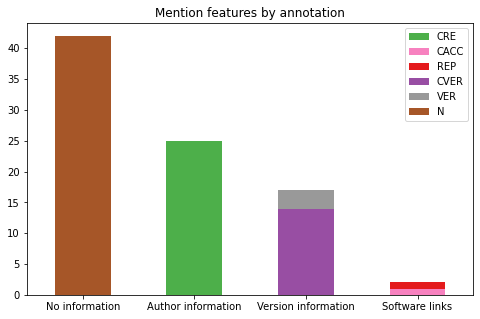

In [60]:
import matplotlib.pyplot as plt

# Sort by category total in decending order
df2.sort_values(by=['Total'], inplace=True, ascending=False)

# Collect columns to render (exclude Total)
plot_cols = [col for col in df2.columns.tolist() if col not in ['Total']]

# Colourblind/-friendly colours adapted from https://gist.github.com/thriveth/8560036
my_colors = ['#4daf4a', '#f781bf', '#e41a1c', '#984ea3', '#999999', '#a65628', '#dede00']

# Create the plot
df2[plot_cols].plot(kind='bar', stacked=True, figsize=(8,5), color=my_colors)

# Add a title and rotate the x-axis labels to be horizontal
plt.title('Mention features by annotation')
plt.xticks(rotation=0, ha='center')